In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
adata = sc.read('../data/processed/adata_annotated.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 28167 × 4000
    obs: 'G2M_score', 'S_score', 'adult_stress', 'baseline', 'batch', 'condition', 'log_counts', 'louvain', 'louvain_high_res', 'mt_fraction', 'n_counts', 'n_genes', 'phase', 'sample_id', 'sample_name', 'size_factors', 'umap_density_adult_stress'
    uns: 'emb', 'louvain', 'louvain_OPC', 'neighbors', 'pca', 'rank_genes_10_sub', 'rank_genes_11_sub', 'rank_genes_13_sub', 'rank_genes_15_sub', 'rank_genes_19_sub', 'rank_genes_20_sub', 'rank_genes_23_sub', 'rank_genes_24_sub', 'rank_genes_28_sub', 'rank_genes_2_sub', 'rank_genes_Astro 1_sub', 'rank_genes_Astro 2_sub', 'rank_genes_Astro 3_sub', 'rank_genes_CCK_sub', 'rank_genes_COP_sub', 'rank_genes_Endothelial 2_sub', 'rank_genes_Endothelial_sub', 'rank_genes_GABA_sub', 'rank_genes_Glut 1_sub', 'rank_genes_Glut 2_sub', 'rank_genes_Glut 3_sub', 'rank_genes_Glut 4_sub', 'rank_genes_Macrophages_sub', 'rank_genes_Microglia 1_sub', 'rank_genes_Microglia 2_sub', 'rank_genes_NPCs_sub', 'rank_genes_

/Users/carlo.dedonno/miniconda3/envs/scpoli/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


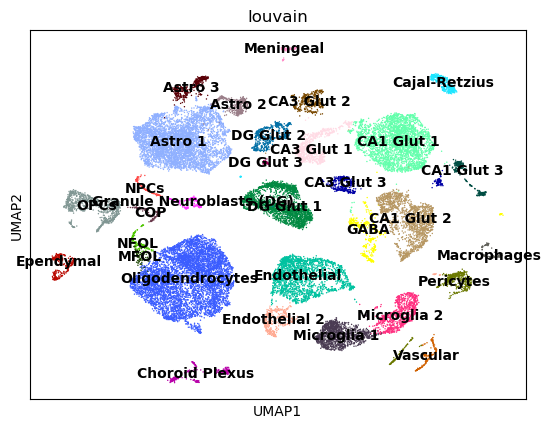

In [4]:
sc.pl.umap(adata, color='louvain', legend_loc='on data')

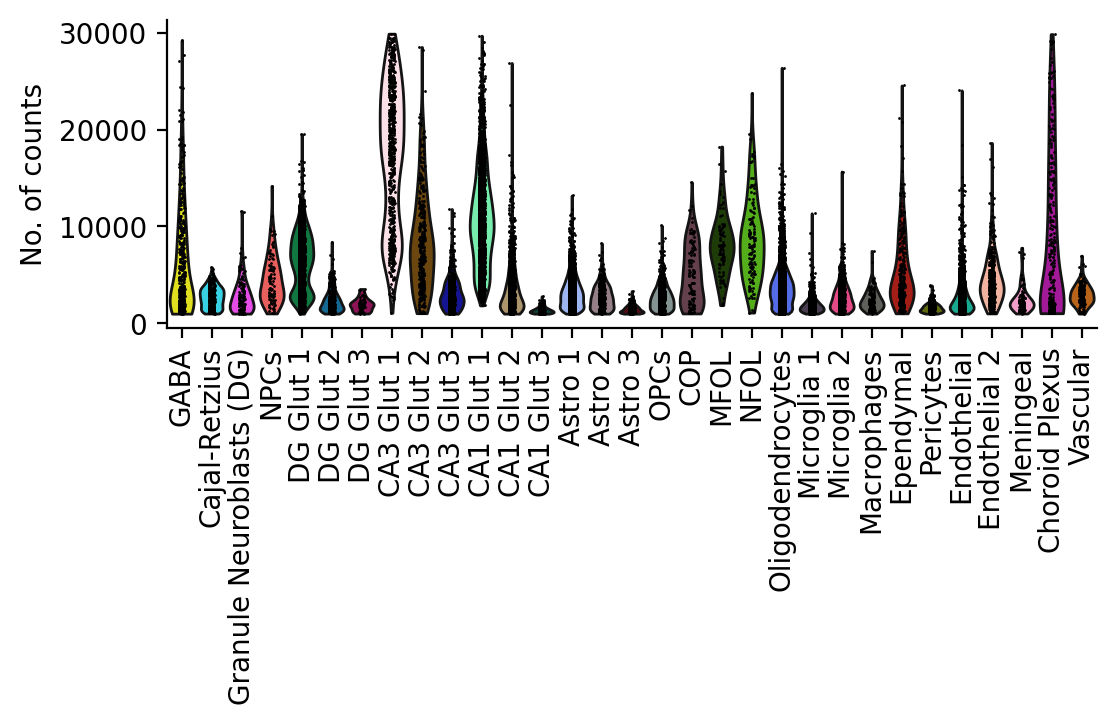

In [5]:
plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(1, 1, figsize=(6, 2))
sc.pl.violin(
    adata, 
    groupby='louvain',
    keys='n_counts', 
    rotation=90, 
    show=False,
    ax=ax,
    linewidth=1,
)
ax.set_ylabel("No. of counts")
sns.despine()
fig.savefig('figures/violinplot_counts.pdf', bbox_inches='tight', dpi=200)

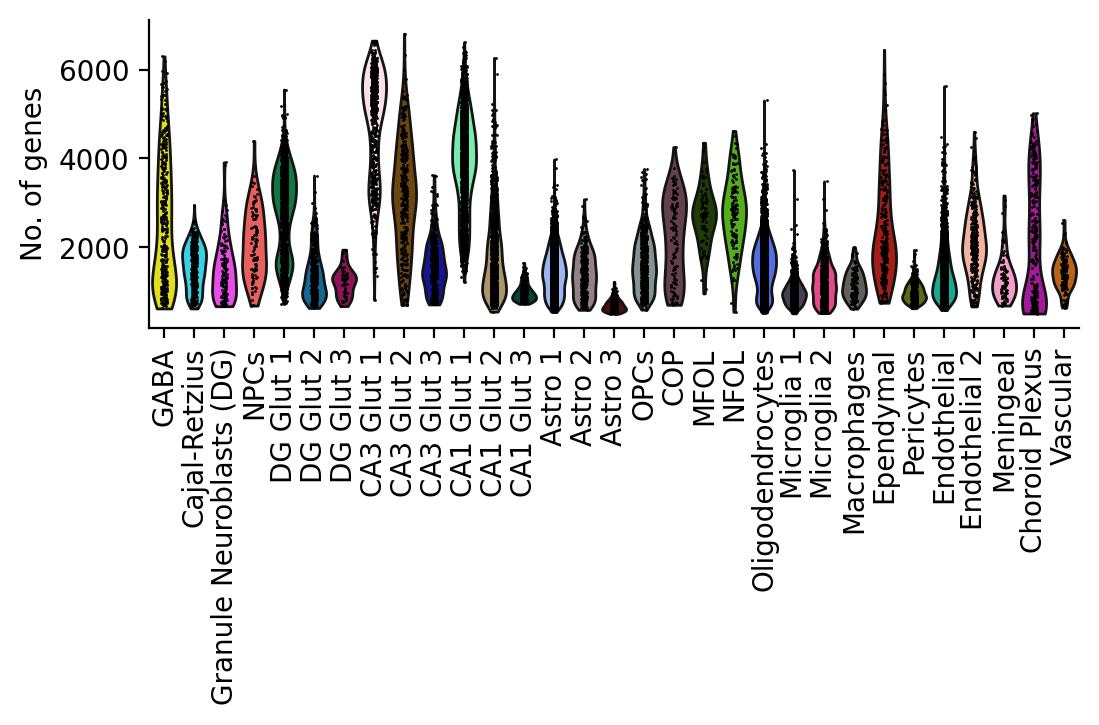

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 2))
sc.pl.violin(
    adata, 
    groupby='louvain',
    keys='n_genes', 
    rotation=90, 
    show=False,
    ax=ax,
    linewidth=1
)
ax.set_ylabel("No. of genes")
sns.despine()
fig.savefig('figures/violinplot_genes.pdf', bbox_inches='tight', dpi=200)

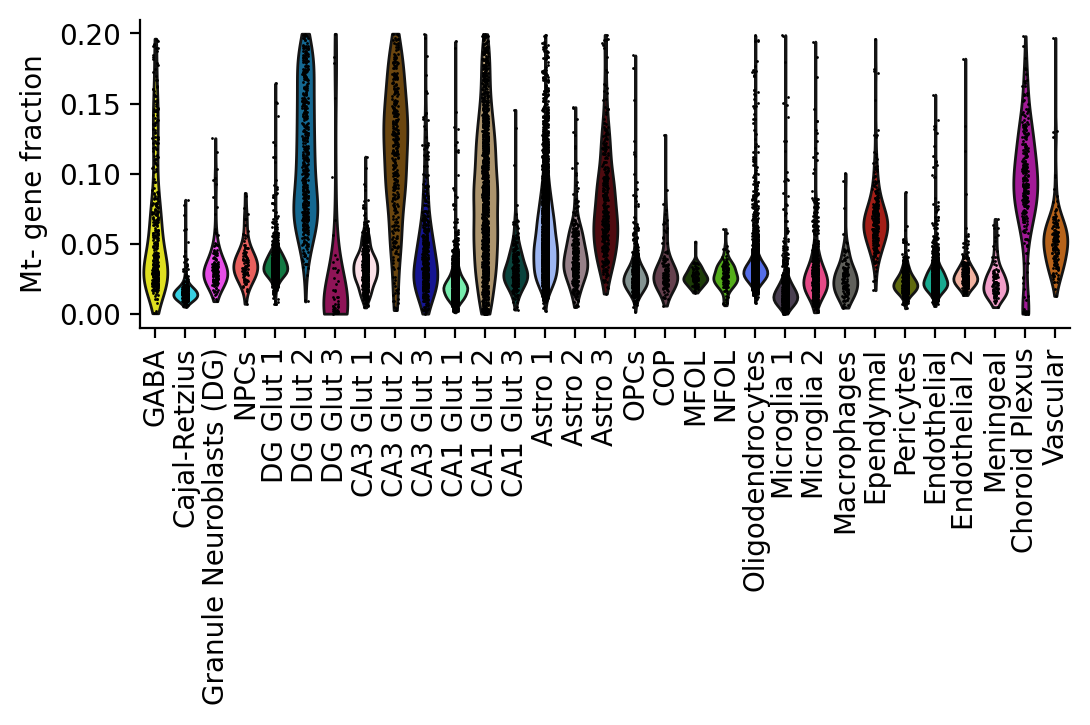

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 2))
sc.pl.violin(
    adata, 
    groupby='louvain',
    keys='mt_fraction', 
    rotation=90, 
    show=False,
    ax=ax,
    linewidth=1
)
ax.set_ylabel("Mt- gene fraction")
sns.despine()
fig.savefig('figures/violinplot_mt.pdf', bbox_inches='tight', dpi=200)

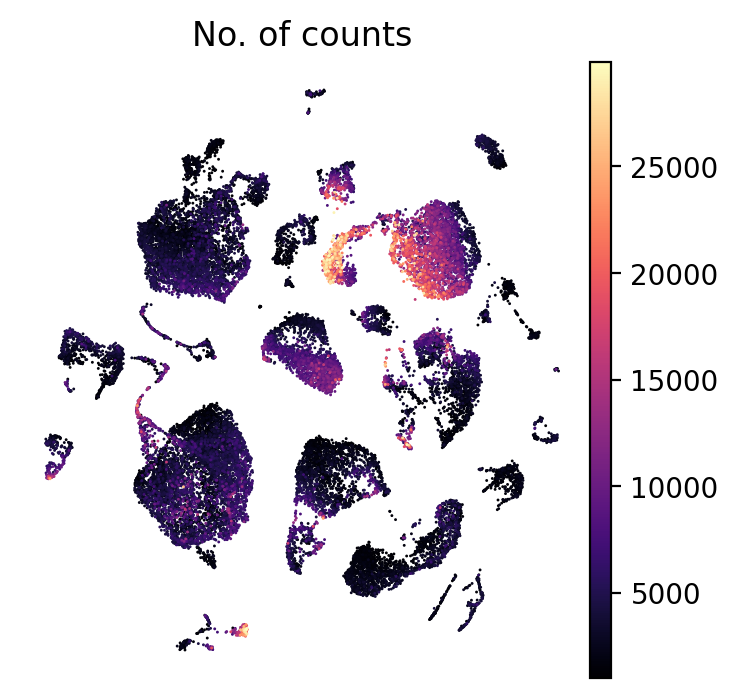

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sc.pl.umap(
    adata, 
    color='n_counts',
    show=False,
    ax=ax,
    frameon=False,
    cmap='magma'
)
ax.set_title("No. of counts")
fig.savefig('figures/umap_counts.pdf', bbox_inches='tight', dpi=200)

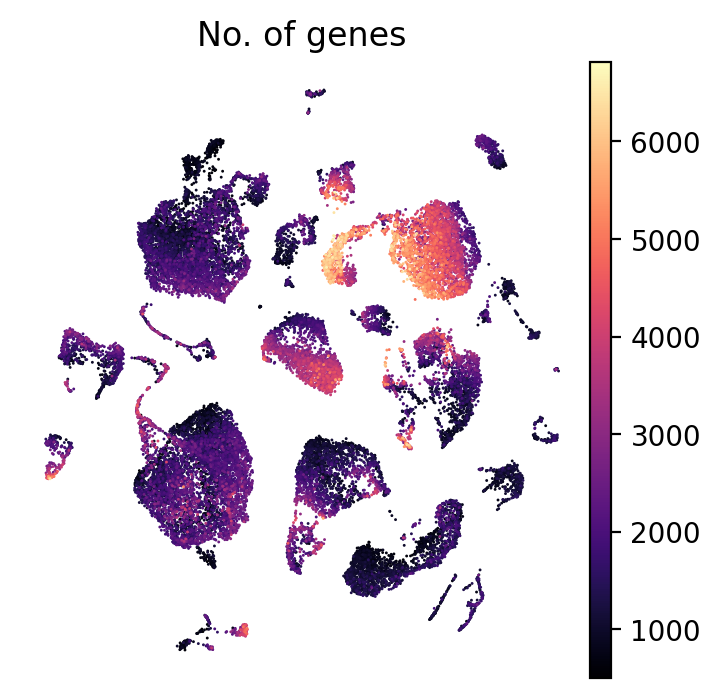

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sc.pl.umap(
    adata, 
    color='n_genes',
    show=False,
    ax=ax,
    frameon=False,
    cmap='magma'
)
ax.set_title("No. of genes")
fig.savefig('figures/umap_genes.pdf', bbox_inches='tight', dpi=200)

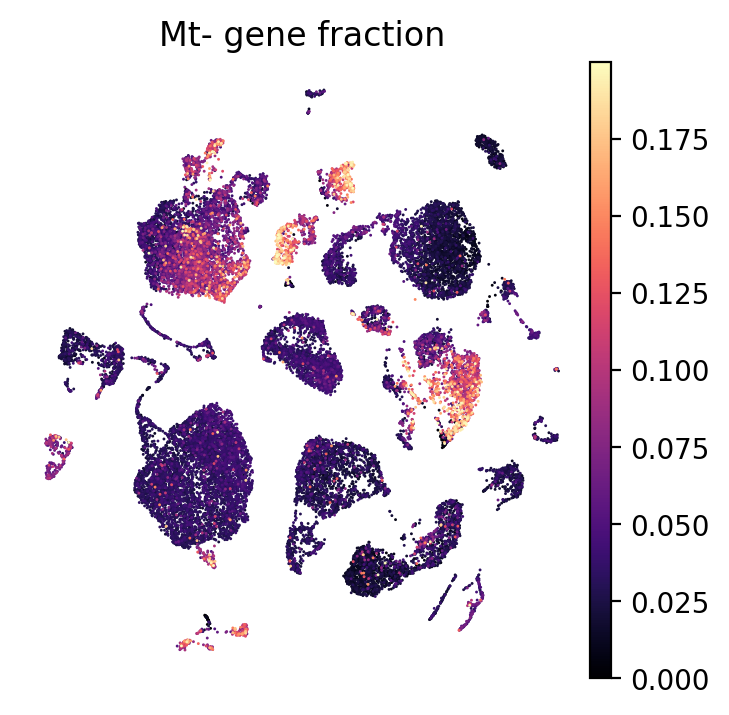

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sc.pl.umap(
    adata, 
    color='mt_fraction',
    show=False,
    ax=ax,
    frameon=False,
    cmap='magma'
)
ax.set_title("Mt- gene fraction")
fig.savefig('figures/umap_mt.pdf', bbox_inches='tight', dpi=200)

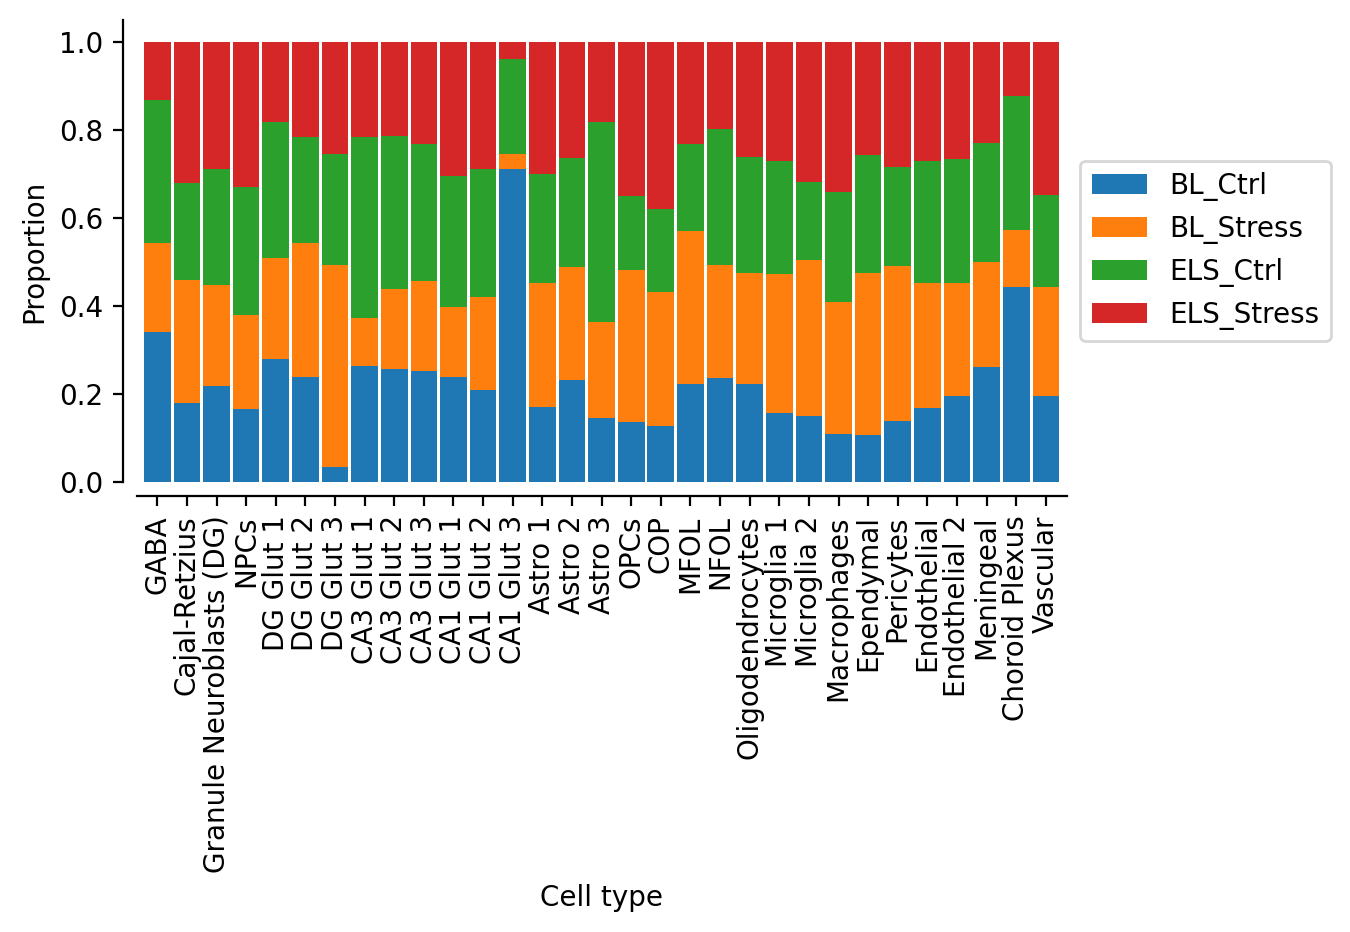

In [17]:
df = (
    adata
    .obs[['louvain', 'condition']]
    .groupby('louvain')['condition']
    .value_counts()
    .unstack('condition')
)
df = pd.DataFrame(df)
df = df.div(df.sum(axis=1), axis=0)

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
df.plot(kind='bar', 
        stacked=True, 
        ax=ax, 
        width=0.9).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
l = ax.get_legend()
sns.despine(offset=5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Cell type')
ax.set_ylabel('Proportion')
fig.savefig('figures/ct_proportions.pdf', bbox_inches='tight', dpi=200)

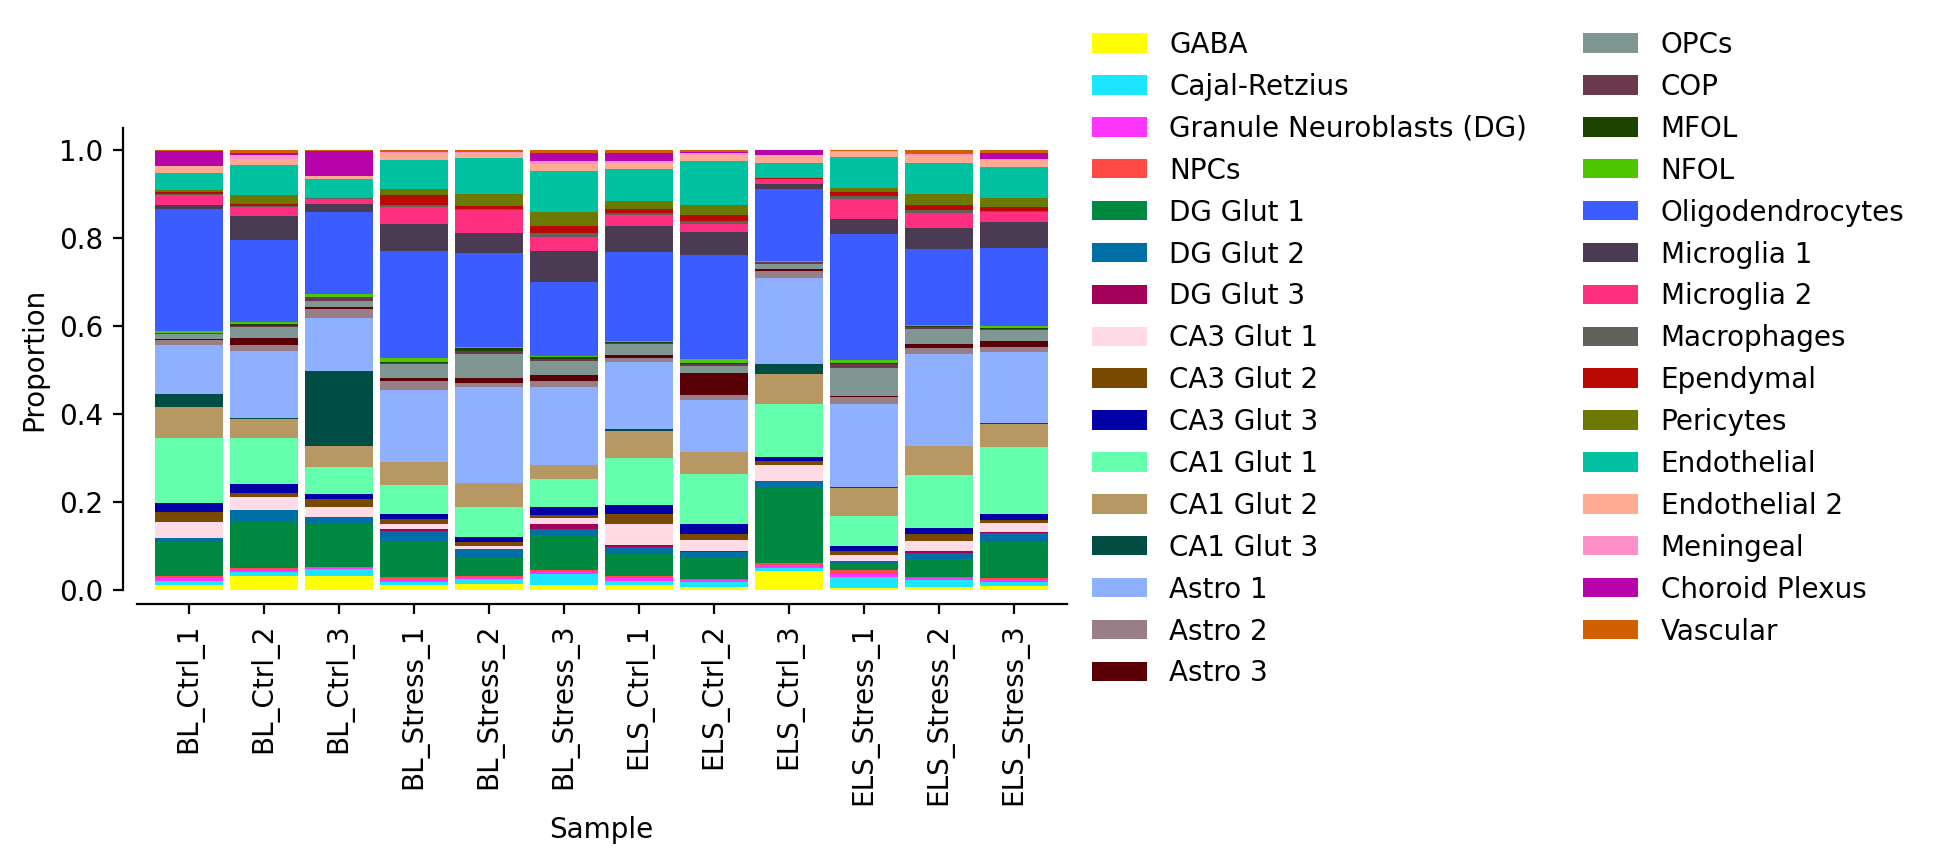

In [20]:
plt.rcParams['figure.dpi'] = 200
df = (
    adata
    .obs[['sample_name', 'louvain']]
    .groupby('sample_name')['louvain']
    .value_counts()
    .unstack('louvain')
)
df = pd.DataFrame(df)
df = df.div(df.sum(axis=1), axis=0)

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
df.plot(kind='bar', 
        stacked=True, 
        ax=ax, 
        color=sc.pl.palettes.default_102,
        width=0.9).legend(loc='center left',bbox_to_anchor=(1.0, 0.5), frameon=False, ncol=2)
l = ax.get_legend()
sns.despine(offset=5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Sample')
ax.set_ylabel('Proportion')
fig.savefig('figures/sample_proportions_ct.pdf', bbox_inches='tight', dpi=200)

In [17]:
colors = [
    '#b3d9ff',
    '#4da6ff',
    '#0059b3',
    '#c2f0c2',
    '#47d147',
    '#196619',
    '#ffe6b3',
    '#ffcc66', 
    '#e69900',
    '#ffb3b3',
    '#ff5050', 
    '#990000',
]

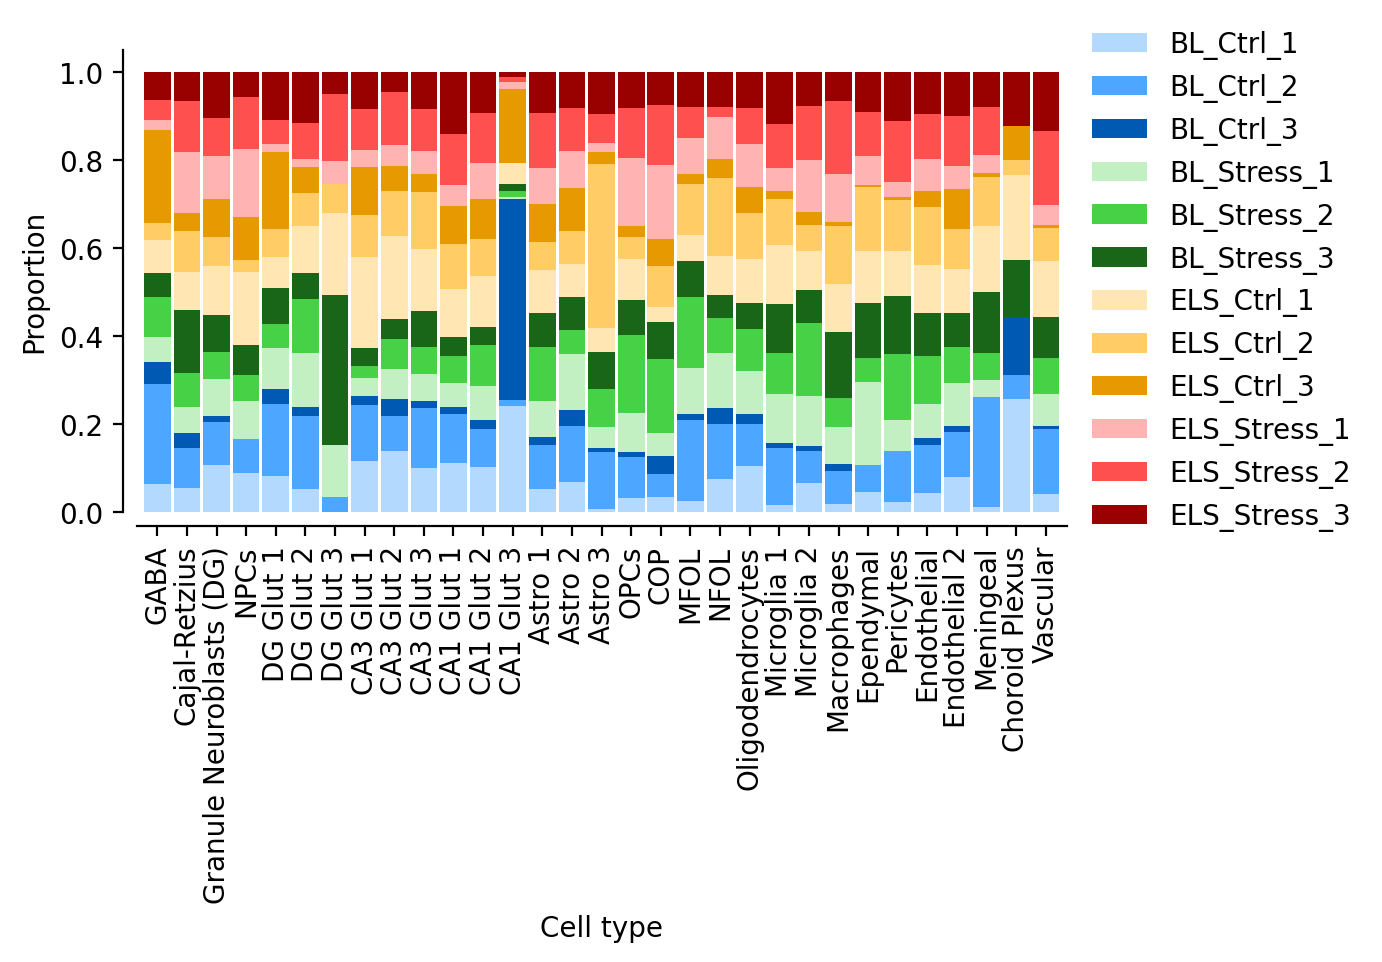

In [19]:
plt.rcParams['figure.dpi'] = 200
df = (
    adata
    .obs[['louvain', 'sample_name']]
    .groupby('louvain')['sample_name']
    .value_counts()
    .unstack('sample_name')
)
df = pd.DataFrame(df)
df = df.div(df.sum(axis=1), axis=0)

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
df.plot(kind='bar', 
        stacked=True, 
        ax=ax, 
        color=colors,
        width=0.9).legend(loc='center left',bbox_to_anchor=(1.0, 0.5), frameon=False)
l = ax.get_legend()
sns.despine(offset=5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Cell type')
ax.set_ylabel('Proportion')
fig.savefig('figures/ct_proportions_sample.pdf', bbox_inches='tight', dpi=200)

/Users/carlo.dedonno/miniconda3/envs/scpoli/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


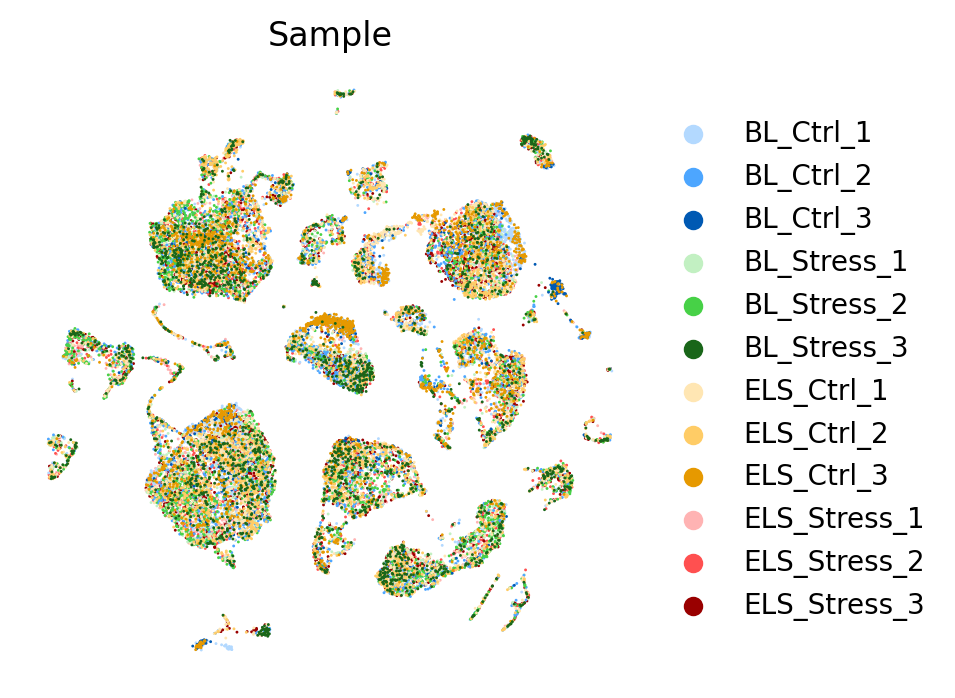

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sc.pl.umap(
    adata, 
    color='sample_name',
    show=False,
    ax=ax,
    frameon=False,
    palette=colors,
)
ax.set_title('Sample')
fig.savefig('figures/umap_sample.pdf', bbox_inches='tight', dpi=200)

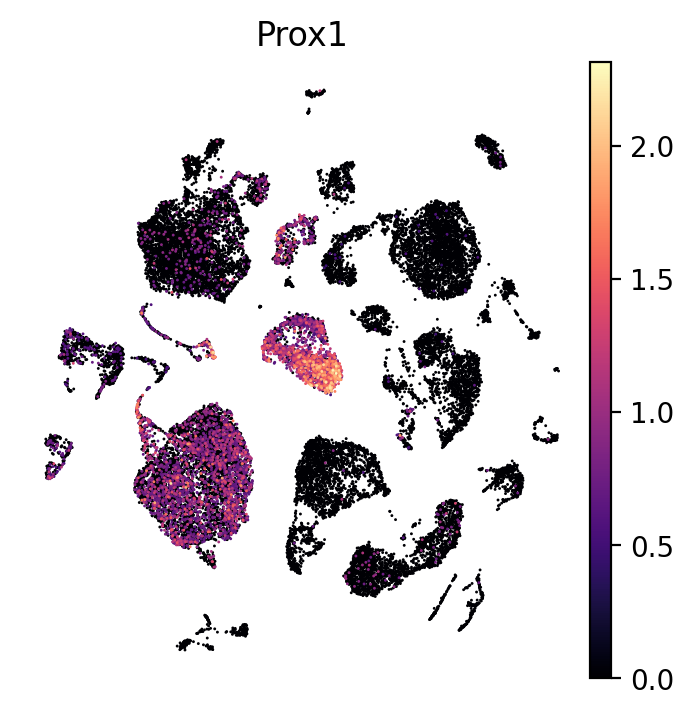

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sc.pl.umap(
    adata, 
    color='Prox1',
    show=False,
    ax=ax,
    frameon=False,
    cmap='magma'
)
fig.savefig('figures/umap_Prox1.pdf', bbox_inches='tight', dpi=200)

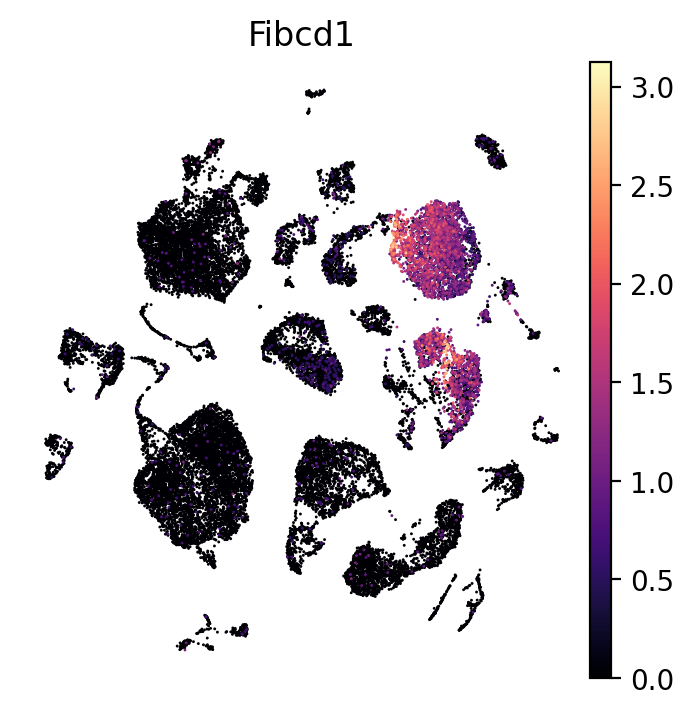

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sc.pl.umap(
    adata, 
    color='Fibcd1',
    show=False,
    ax=ax,
    frameon=False,
    cmap='magma'
)
fig.savefig('figures/umap_Fibcd1.pdf', bbox_inches='tight', dpi=200)

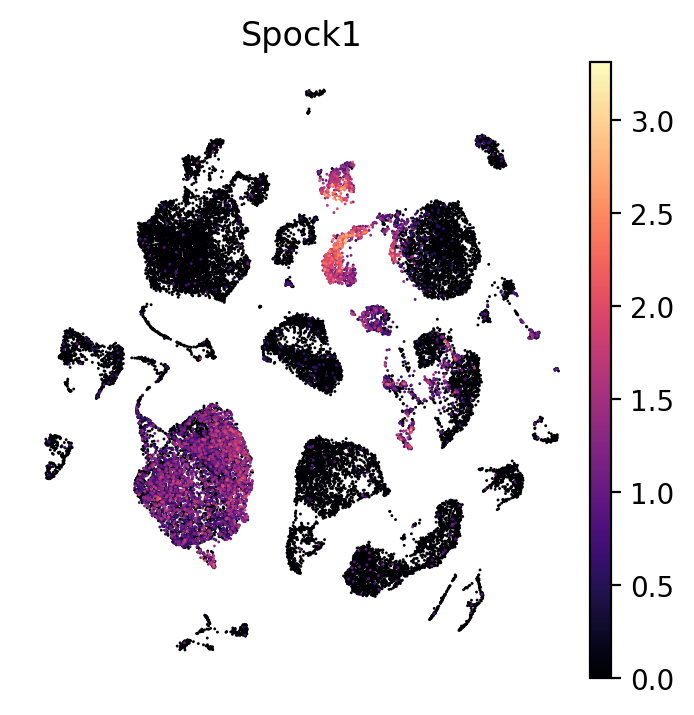

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sc.pl.umap(
    adata, 
    color='Spock1',
    show=False,
    ax=ax,
    frameon=False,
    cmap='magma'
)
fig.savefig('figures/umap_Spock1.pdf', bbox_inches='tight', dpi=200)

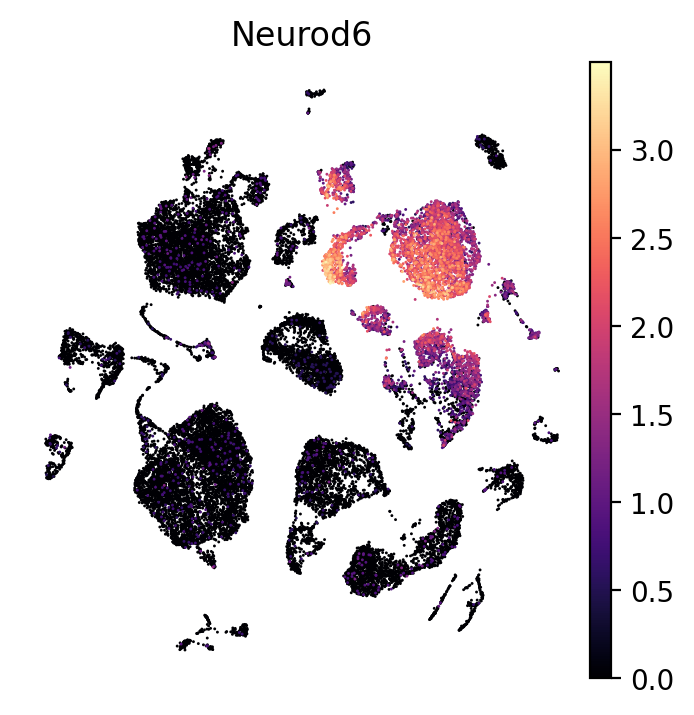

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sc.pl.umap(
    adata, 
    color='Neurod6',
    show=False,
    ax=ax,
    frameon=False,
    cmap='magma'
)
fig.savefig('figures/umap_Neurod6.pdf', bbox_inches='tight', dpi=200)

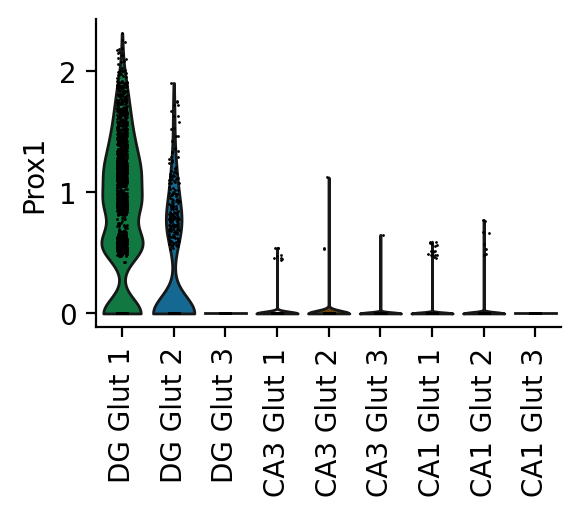

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
sc.pl.violin(
    adata[adata.obs['louvain'].str.contains('Glut')], 
    groupby='louvain',
    keys='Prox1', 
    rotation=90, 
    show=False,
    ax=ax,
    linewidth=1
)
ax.set_ylabel("Prox1")
sns.despine()
fig.savefig('figures/violinplot_Prox1.pdf', bbox_inches='tight', dpi=200)

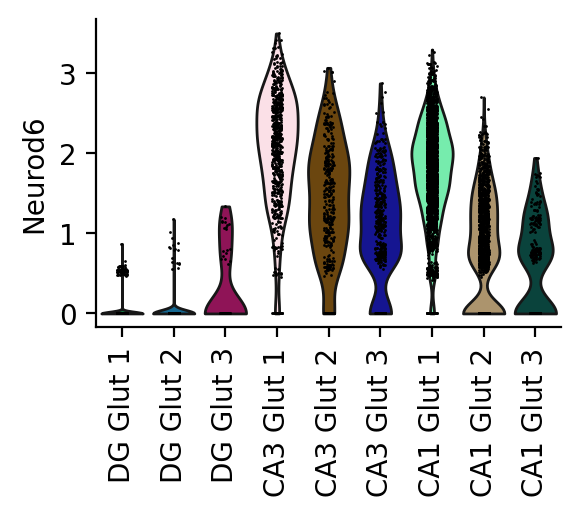

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
sc.pl.violin(
    adata[adata.obs['louvain'].str.contains('Glut')], 
    groupby='louvain',
    keys='Neurod6', 
    rotation=90, 
    show=False,
    ax=ax,
    linewidth=1
)
ax.set_ylabel("Neurod6")
sns.despine()
fig.savefig('figures/violinplot_Neurod6.pdf', bbox_inches='tight', dpi=200)

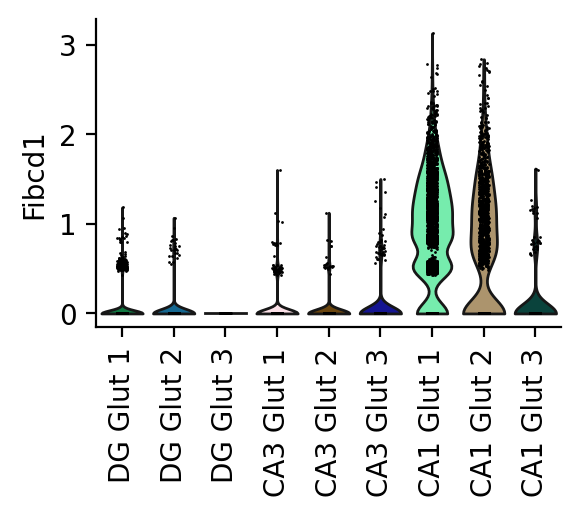

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
sc.pl.violin(
    adata[adata.obs['louvain'].str.contains('Glut')], 
    groupby='louvain',
    keys='Fibcd1', 
    rotation=90, 
    show=False,
    ax=ax,
    linewidth=1
)
ax.set_ylabel("Fibcd1")
sns.despine()
fig.savefig('figures/violinplot_Fibcd1.pdf', bbox_inches='tight', dpi=200)

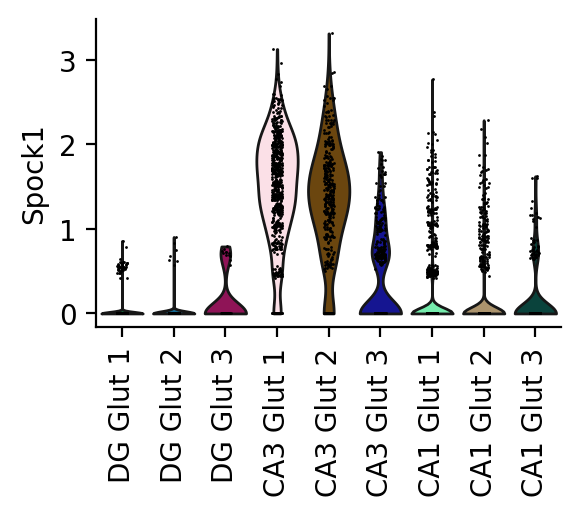

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
sc.pl.violin(
    adata[adata.obs['louvain'].str.contains('Glut')], 
    groupby='louvain',
    keys='Spock1', 
    rotation=90, 
    show=False,
    ax=ax,
    linewidth=1
)
ax.set_ylabel("Spock1")
sns.despine()
fig.savefig('figures/violinplot_Spock1.pdf', bbox_inches='tight', dpi=200)